In [1]:
# https://giusedroid.blogspot.com/2015/04/using-python-and-k-means-in-hsv-color.html
%matplotlib inline
import cv2
from scipy.cluster.vq import vq, kmeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob
import os, os.path
import random
from sklearn.utils import shuffle

# Get images, get sample pixels, create color table where k = 64

In [2]:
# DONE
# https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary
# https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder/47114735

images = []
count = 0
path = "C:\Users\Shelby\Desktop\UMKC\Academics\Fall20\ComputerVision\NWPU-RESISC45"
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for filename in os.listdir(folder_path):
        if count < 100:
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
                images.append(hsv_img) 
                count += 1
        else:
            len(images)
            count = 0
            break

len(images)

1500

In [3]:
images[0].shape

(256L, 256L, 3L)

In [4]:
# DONE

flattened_images = []
for image in images:
    flattened_images.append(image.reshape(-1, 3))

flattened_images[0].shape

(65536L, 3L)

In [5]:
# DONE
# https://stackoverflow.com/questions/38190476/use-of-random-state-parameter-in-sklearn-utils-shuffle
# https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

hsv_train = []
for image in flattened_images:
    sample = shuffle(image, random_state=0)[:100] # shuffle image matrix, then return first 100 pixels
    for pixel in sample:
        hsv_train.append(pixel.astype(np.float))

len(hsv_train) # = 150,000
hsv_train[0] # = 1 x 3 array

array([  94.,   36.,  105.])

In [10]:
# GOAL: Take list of randomly selected pixels (hsv_train) and find the COLOR TABLE where k = 64

hsv_table,_ = kmeans(hsv_train, 64)

In [11]:
hsv_table[0].shape

(3L,)

# Gets histogram for image (bar chart bonus)

In [12]:
# for one image at a time
# https://stackoverflow.com/questions/43650931/python-alternative-for-calculating-pairwise-distance-between-two-sets-of-2d-poin
# https://www.tutorialspoint.com/scipy/scipy_cluster.htm

# c = dim, cluster_data = x, codebook = color_bins
def getHist(im, color_bins):
    cluster_data = im.reshape(-1, 3) # dim should = 3
    [n, dim] = cluster_data.shape # data points
    [m, dim] = color_bins.shape # bin
    
    # find nearest bin to colors using Euclidean distance
    # increment corresponding bin
    # compute distribution
        
    # https://giusedroid.blogspot.com/2015/04/using-python-and-k-means-in-hsv-color.html
    # https://docs.scipy.org/doc/scipy/reference/cluster.vq.html
    # vq: assigns codes from a codebook to obervations
    # quantizes image; assigns each value into one of the predetermined color bins (clusters)
    data,_ = vq(cluster_data[:,0:3], color_bins)
    print len(data)
    print data
    
    # calculates the number of elements for each cluster - NOT NECCESSARY
    weights = [len(data[data == i]) for i in range(0,64)]
    print weights
    
    print sum(weights)
    normalized_weights = []
    for weight in weights:
        normalized_weights.append(float(weight)/sum(weights))

    print normalized_weights
    print(sum(normalized_weights))
    plt.bar(np.arange(len(normalized_weights)), normalized_weights)
    
    
#     fig = plt.figure()
#     ax = plt.axes(projection="3d")
#     ax.scatter3D(color_bins[:, 1], color_bins[:, 2], color_bins[:, 3])


65536
[54 51 36 ..., 31 31 31]
[5236, 0, 345, 13, 4, 79, 27, 418, 658, 26, 0, 0, 3, 12966, 1851, 1253, 9, 393, 0, 0, 871, 1987, 1266, 0, 253, 39, 110, 20, 455, 2897, 2173, 1809, 1264, 107, 224, 227, 5711, 20, 68, 1, 119, 0, 1548, 13745, 833, 1, 0, 10, 0, 91, 133, 1646, 1537, 0, 476, 107, 914, 0, 130, 17, 71, 0, 0, 1375]
65536
[0.07989501953125, 0.0, 0.0052642822265625, 0.0001983642578125, 6.103515625e-05, 0.0012054443359375, 0.0004119873046875, 0.006378173828125, 0.010040283203125, 0.000396728515625, 0.0, 0.0, 4.57763671875e-05, 0.197845458984375, 0.0282440185546875, 0.0191192626953125, 0.0001373291015625, 0.0059967041015625, 0.0, 0.0, 0.0132904052734375, 0.0303192138671875, 0.019317626953125, 0.0, 0.0038604736328125, 0.0005950927734375, 0.001678466796875, 0.00030517578125, 0.0069427490234375, 0.0442047119140625, 0.0331573486328125, 0.0276031494140625, 0.019287109375, 0.0016326904296875, 0.00341796875, 0.0034637451171875, 0.0871429443359375, 0.00030517578125, 0.00103759765625, 1.525878

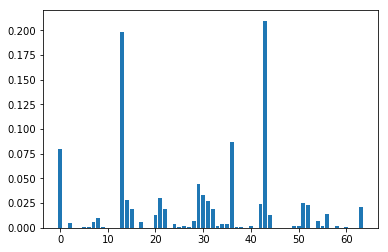

In [13]:
# selects image and prints bar graph
getHist(images[5], hsv_table)